# Red Neuronal Simple

## Cargar los datos

In [ ]:
import numpy as np
import struct

def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Cargar las imágenes y etiquetas de entrenamiento
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')

# Cargar las imágenes y etiquetas de prueba
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

##  Inicializar los parámetros

In [ ]:
import numpy as np

def initialize_parameters_simple(input_size, output_size):
    np.random.seed(42)
    W = np.random.randn(input_size, output_size) * 0.01
    b = np.zeros((1, output_size))
    return W, b


##  Implementar la función de activación softmax

In [ ]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / expZ.sum(axis=1, keepdims=True)


## Propagación hacia adelante

In [ ]:
def forward_propagation_simple(X, W, b):
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return Z, A


## Función de pérdida (Cross-Entropy)

In [ ]:
def compute_loss_simple(A, Y):
    m = Y.shape[0]
    log_probs = -np.log(A[range(m), Y])
    loss = np.sum(log_probs) / m
    return loss


## Propagación hacia atrás

In [ ]:
def backward_propagation_simple(X, Y, A):
    m = X.shape[0]
    dZ = A
    dZ[range(m), Y] -= 1
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ, axis=0, keepdims=True) / m
    return dW, db


## Actualizar los parámetros

In [ ]:
def update_parameters_simple(W, b, dW, db, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b


## Entrenar el modelo

In [ ]:
def train_neural_network_simple(X, Y, output_size, epochs, learning_rate):
    input_size = X.shape[1]
    W, b = initialize_parameters_simple(input_size, output_size)

    for i in range(epochs):
        Z, A = forward_propagation_simple(X, W, b)
        loss = compute_loss_simple(A, Y)
        dW, db = backward_propagation_simple(X, Y, A)
        W, b = update_parameters_simple(W, b, dW, db, learning_rate)

        if i % 10 == 0:
          print(f'Epoch {i}, Pérdida: {loss:.4f}')

    return W, b


## Parámetros del modelo

In [ ]:
output_size = 10
epochs = 1000
learning_rate = 0.1

W, b = train_neural_network_simple(train_images, train_labels, output_size, epochs, learning_rate)


Epoch 0, Pérdida: 2.3277
Epoch 10, Pérdida: 1.5620
Epoch 20, Pérdida: 1.1955
Epoch 30, Pérdida: 0.9995
Epoch 40, Pérdida: 0.8799
Epoch 50, Pérdida: 0.7994
Epoch 60, Pérdida: 0.7413
Epoch 70, Pérdida: 0.6971
Epoch 80, Pérdida: 0.6623
Epoch 90, Pérdida: 0.6340
Epoch 100, Pérdida: 0.6104
Epoch 110, Pérdida: 0.5905
Epoch 120, Pérdida: 0.5734
Epoch 130, Pérdida: 0.5585
Epoch 140, Pérdida: 0.5454
Epoch 150, Pérdida: 0.5337
Epoch 160, Pérdida: 0.5233
Epoch 170, Pérdida: 0.5139
Epoch 180, Pérdida: 0.5053
Epoch 190, Pérdida: 0.4975
Epoch 200, Pérdida: 0.4903
Epoch 210, Pérdida: 0.4837
Epoch 220, Pérdida: 0.4776
Epoch 230, Pérdida: 0.4720
Epoch 240, Pérdida: 0.4667
Epoch 250, Pérdida: 0.4617
Epoch 260, Pérdida: 0.4571
Epoch 270, Pérdida: 0.4527
Epoch 280, Pérdida: 0.4486
Epoch 290, Pérdida: 0.4448
Epoch 300, Pérdida: 0.4411
Epoch 310, Pérdida: 0.4376
Epoch 320, Pérdida: 0.4343
Epoch 330, Pérdida: 0.4312
Epoch 340, Pérdida: 0.4282
Epoch 350, Pérdida: 0.4253
Epoch 360, Pérdida: 0.4226
Epoch 370, P

## Evaluar el modelo

In [ ]:
# Hacer predicciones en el conjunto de prueba
def predict_simple(X, W, b):
    _, A = forward_propagation_simple(X, W, b)
    return np.argmax(A, axis=1)

# Calcular la precisión en el conjunto de prueba
test_predictions = predict_simple(test_images, W, b)
test_accuracy = np.mean(test_predictions == test_labels)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')
print(W)
print(b)


Precisión en el conjunto de prueba: 92.10%
[[ 0.00496714 -0.00138264  0.00647689 ...  0.00767435 -0.00469474
   0.0054256 ]
 [-0.00463418 -0.0046573   0.00241962 ...  0.00314247 -0.00908024
  -0.01412304]
 [ 0.01465649 -0.00225776  0.00067528 ...  0.00375698 -0.00600639
  -0.00291694]
 ...
 [ 0.00577072 -0.00178023  0.00155155 ... -0.00896368 -0.00448696
   0.00234259]
 [ 0.00598996  0.00853349 -0.0049419  ... -0.00220932  0.00191124
  -0.01149707]
 [-0.0019361   0.00744586  0.00641947 ... -0.00077821 -0.00275951
  -0.00361724]]
[[-0.36973165  0.34861316  0.09697155 -0.26538679  0.0341158   1.25432479
  -0.08674373  0.62201758 -1.39322795 -0.24095275]]


## Clasificar nuevas imágenes

In [ ]:
all_predictions = predict_simple(test_images, W, b)

incorrect_indices = np.where(all_predictions != test_labels)[0]

print(f"Total de errores: {len(incorrect_indices)}")

# Mostrar las primeras 10 imágenes 
for i in incorrect_indices[:10]:
    print(f'Imagen {i + 1}: Dígito predicho: {all_predictions[i]}, Dígito real: {test_labels[i]}')

Total de errores: 790
Imagen 9: Dígito predicho: 6, Dígito real: 5
Imagen 34: Dígito predicho: 6, Dígito real: 4
Imagen 64: Dígito predicho: 2, Dígito real: 3
Imagen 67: Dígito predicho: 7, Dígito real: 6
Imagen 78: Dígito predicho: 7, Dígito real: 2
Imagen 93: Dígito predicho: 4, Dígito real: 9
Imagen 125: Dígito predicho: 4, Dígito real: 7
Imagen 150: Dígito predicho: 9, Dígito real: 2
Imagen 194: Dígito predicho: 3, Dígito real: 9
Imagen 196: Dígito predicho: 5, Dígito real: 3


## Visualizar la imagen y la predicción

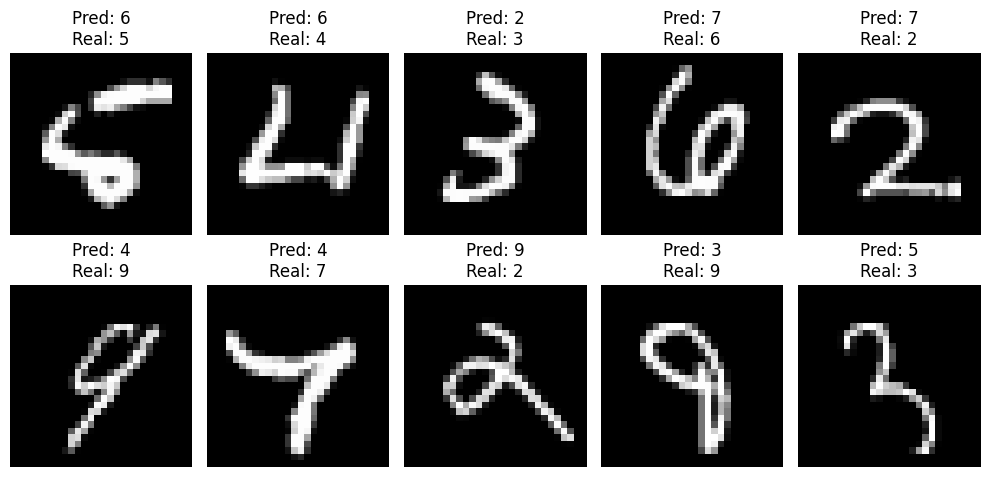

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for index, i in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {all_predictions[i]}\nReal: {test_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Guardar los parámetros del modelo entrenado

In [ ]:
import numpy as np

np.save('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Simple/weights-5100.npy', W)
np.save('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Simple/biases-51000.npy', b)


## Cargar los parámetros guardados

In [ ]:
import numpy as np
import struct

W = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Simple/weights-5100.npy')
b = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Simple/biases-51000.npy')


## Continuar con el entrenamiento del modelo cargado

In [ ]:
def continue_train_neural_network(X, Y, W, b, epochs, learning_rate):
    for i in range(epochs):
        Z, A = forward_propagation_simple(X, W, b)
        loss = compute_loss_simple(A, Y)
        dW, db = backward_propagation_simple(X, Y, A)
        W, b = update_parameters_simple(W, b, dW, db, learning_rate)

        if i % 10 == 0:
            print(f'Epoch {i}, Pérdida: {loss:.4f}')

    return W, b

## Continuar el entrenamiento

In [ ]:
additional_epochs = 500
learning_rate = 0.1

W, b = continue_train_neural_network(train_images, train_labels, W, b, additional_epochs, learning_rate)

Epoch 0, Pérdida: 0.2865
Epoch 10, Pérdida: 0.2865
Epoch 20, Pérdida: 0.2864
Epoch 30, Pérdida: 0.2864
Epoch 40, Pérdida: 0.2863
Epoch 50, Pérdida: 0.2862
Epoch 60, Pérdida: 0.2862
Epoch 70, Pérdida: 0.2861
Epoch 80, Pérdida: 0.2861
Epoch 90, Pérdida: 0.2860
Epoch 100, Pérdida: 0.2859
Epoch 110, Pérdida: 0.2859
Epoch 120, Pérdida: 0.2858
Epoch 130, Pérdida: 0.2858
Epoch 140, Pérdida: 0.2857
Epoch 150, Pérdida: 0.2857
Epoch 160, Pérdida: 0.2856
Epoch 170, Pérdida: 0.2855
Epoch 180, Pérdida: 0.2855
Epoch 190, Pérdida: 0.2854
Epoch 200, Pérdida: 0.2854
Epoch 210, Pérdida: 0.2853
Epoch 220, Pérdida: 0.2853
Epoch 230, Pérdida: 0.2852
Epoch 240, Pérdida: 0.2851
Epoch 250, Pérdida: 0.2851
Epoch 260, Pérdida: 0.2850
Epoch 270, Pérdida: 0.2850
Epoch 280, Pérdida: 0.2849
Epoch 290, Pérdida: 0.2849
Epoch 300, Pérdida: 0.2848
Epoch 310, Pérdida: 0.2848
Epoch 320, Pérdida: 0.2847
Epoch 330, Pérdida: 0.2846
Epoch 340, Pérdida: 0.2846
Epoch 350, Pérdida: 0.2845
Epoch 360, Pérdida: 0.2845
Epoch 370, P

# Red Neuronal Simple Óptimizada

Época 1/20 - Pérdida promedio: 0.3506 - Precisión (Train): 90.47% - Precisión (Test): 90.61%
Época 2/20 - Pérdida promedio: 0.2939 - Precisión (Train): 90.97% - Precisión (Test): 91.05%
Época 3/20 - Pérdida promedio: 0.2833 - Precisión (Train): 91.26% - Precisión (Test): 91.12%
Época 4/20 - Pérdida promedio: 0.2773 - Precisión (Train): 91.39% - Precisión (Test): 91.10%
Época 5/20 - Pérdida promedio: 0.2731 - Precisión (Train): 91.52% - Precisión (Test): 91.19%
Época 6/20 - Pérdida promedio: 0.2700 - Precisión (Train): 91.61% - Precisión (Test): 91.22%
Época 7/20 - Pérdida promedio: 0.2675 - Precisión (Train): 91.69% - Precisión (Test): 91.24%
Época 8/20 - Pérdida promedio: 0.2654 - Precisión (Train): 91.73% - Precisión (Test): 91.24%
Época 9/20 - Pérdida promedio: 0.2637 - Precisión (Train): 91.79% - Precisión (Test): 91.27%
Época 10/20 - Pérdida promedio: 0.2622 - Precisión (Train): 91.82% - Precisión (Test): 91.23%
Época 11/20 - Pérdida promedio: 0.2608 - Precisión (Train): 91.85% - 

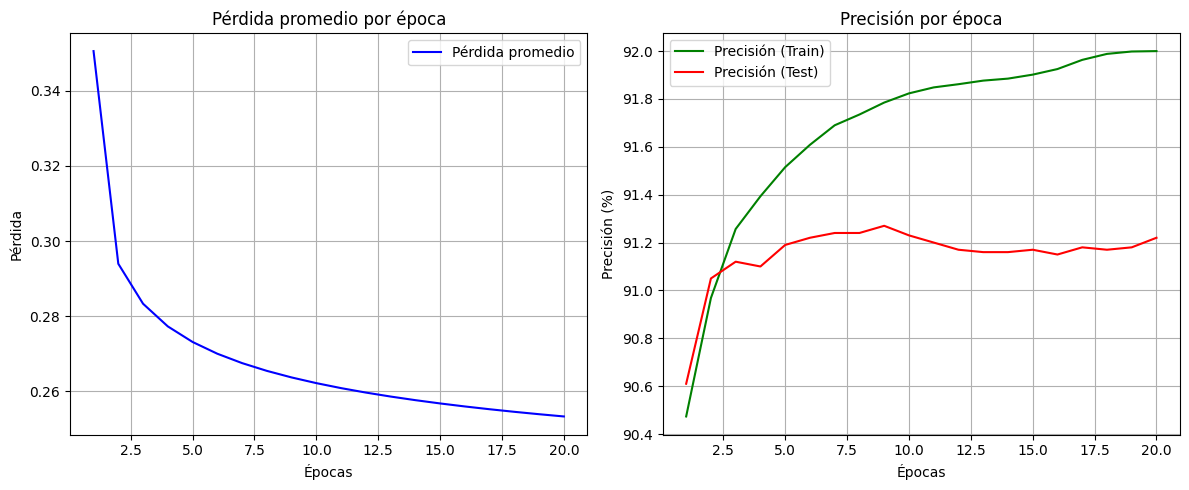

In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt


# Funciones para cargar imágenes y etiquetas
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Cargar y preprocesar datos
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

# Normalizar y redimensionar imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 1, 28, 28))
test_images = test_images.reshape((-1, 1, 28, 28))

# Funciones para la Red Neuronal Simple
def relu(x):
    return np.maximum(0, x)

def dense_layer(input_data, weights, bias):
    return np.dot(input_data, weights.T) + bias

def predict_simple(image, weights, bias):
    output = dense_layer(image.flatten(), weights, bias)
    return np.argmax(output)

# Función de entrenamiento para capturar métricas
def train_simple(train_images, train_labels, test_images, test_labels, epochs, learning_rate):
    input_size = 784
    num_classes = 10
    weights = np.random.randn(num_classes, input_size) * 0.01
    bias = np.zeros(num_classes)

    losses = []  
    train_accuracies = []  
    test_accuracies = [] 

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(train_images)):
            image = train_images[i]
            label = train_labels[i]

            # Propagación hacia adelante
            output = dense_layer(image.flatten(), weights, bias)
            softmax_out = np.exp(output) / np.sum(np.exp(output))  # Softmax

            # Pérdida
            loss = -np.log(softmax_out[label])
            total_loss += loss

            # Retropropagación
            d_out = softmax_out
            d_out[label] -= 1

            # Gradientes
            dW = np.outer(d_out, image.flatten())
            db = d_out

            # Actualización de pesos
            weights -= learning_rate * dW
            bias -= learning_rate * db

        avg_loss = total_loss / len(train_images)
        losses.append(avg_loss)  # pérdida promedio

        # Calcular precisión en entrenamiento y prueba
        train_accuracy = evaluate_simple_model(train_images, train_labels, weights, bias)
        test_accuracy = evaluate_simple_model(test_images, test_labels, weights, bias)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Época {epoch + 1}/{epochs} - Pérdida promedio: {avg_loss:.4f} - Precisión (Train): {train_accuracy * 100:.2f}% - Precisión (Test): {test_accuracy * 100:.2f}%")

    return weights, bias, losses, train_accuracies, test_accuracies

def evaluate_simple_model(test_images, test_labels, weights, bias):
    correct_predictions = 0
    for i in range(len(test_images)):
        # Aplanar la imagen
        image = test_images[i].flatten()

        # Propagación hacia adelante
        logits = np.dot(image, weights.T) + bias
        softmax_outs = np.exp(logits - np.max(logits))  # Estabilidad numérica
        softmax_outs /= np.sum(softmax_outs)

        # Predecir la clase
        prediction = np.argmax(softmax_outs)

        # Comparar con la etiqueta real
        if prediction == test_labels[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(test_images)
    return accuracy

# Entrenar el modelo y recolectar métricas
epochs = 20
initial_learning_rate = 0.01
weights_simple, bias_simple, losses, train_accuracies, test_accuracies = train_simple(
    train_images, train_labels, test_images, test_labels, epochs, initial_learning_rate
)

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 5))

# Pérdida promedio
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, label="Pérdida promedio", color="blue")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida promedio por época")
plt.grid()
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), [acc * 100 for acc in train_accuracies], label="Precisión (Train)", color="green")
plt.plot(range(1, epochs + 1), [acc * 100 for acc in test_accuracies], label="Precisión (Test)", color="red")
plt.xlabel("Épocas")
plt.ylabel("Precisión (%)")
plt.title("Precisión por época")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Guardar y Cargar Parámetros Red Neuronal Simple

In [ ]:
# Guardar parámetros de la red simple
np.save('/content/drive/MyDrive/Colab Notebooks/IC/Redes Optimizadas/simple_model_weights-25.npy', weights_simple)
np.save('/content/drive/MyDrive/Colab Notebooks/IC/Redes Optimizadas/simple_model_bias-25.npy', bias_simple)

# Cargar parámetros de la red simple
weights_simple = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Redes Optimizadas/simple_model_weights-25.npy')
bias_simple = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Redes Optimizadas/simple_model_bias-25.npy')
